## Logistic regression
### Visualizing data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy import signal
import tkinter as tk
from tkinter import filedialog
import pathlib
from pathlib import Path
import os
import time
import librosa
import IPython.display as ipd
from librosa import display
import pandas as pd

In [2]:
cwd = Path.cwd()
file_path = Path(cwd).joinpath(r'Unit4', 'input_dataset-2.parquet')
print(file_path)

C:\Users\100cgj\OneDrive - Sysco AS\Dokumenter\Hackaton\krafthack2022onsite\Unit4\input_dataset-2.parquet


In [3]:
tic = time.time()
df = pd.read_parquet(file_path)
toc = time.time()
print("Load Time:",toc-tic)


Load Time: 1.0047917366027832


In [4]:
dfColumns = df.columns
data = []
for x in dfColumns:
    data.append(df[x])
time = np.linspace(0,df.shape[0],df.shape[0])

## Unfixed Data

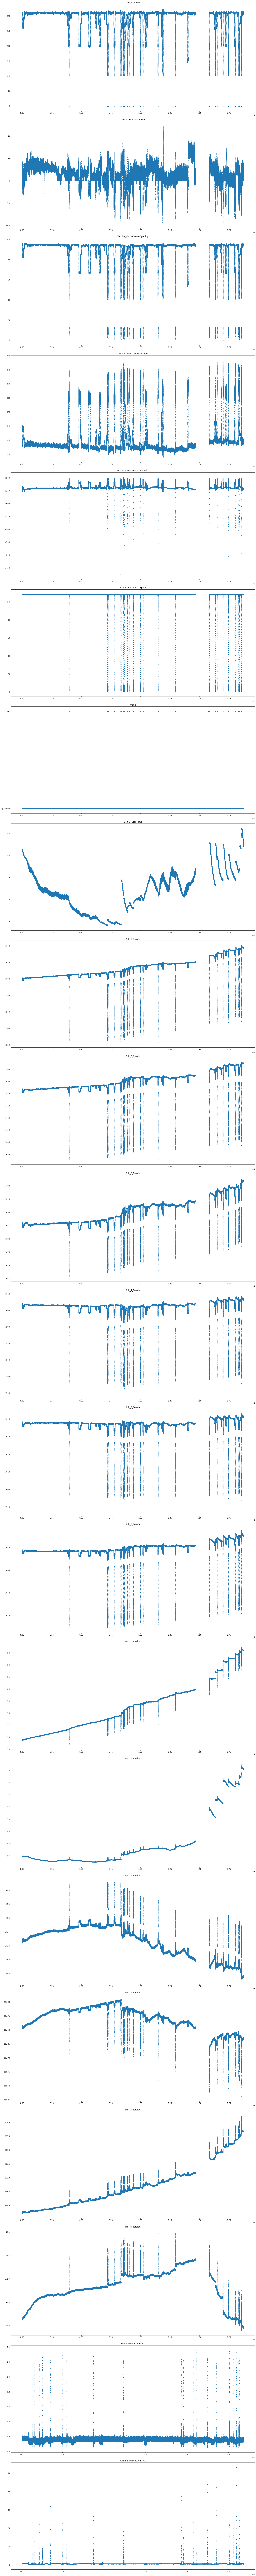

In [5]:
fig, axs = plt.subplots(len(data), figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].scatter(time,data[i], marker = ".")
    axs[i].set_title(dfColumns[i])
fig.tight_layout()
plt.show()

## Fix the data and save to a new files with fixed data

Delete the data where there is no value

create a dataframe for each bolt tension and torsion

In [6]:
bolt1Columns=['Turbine_Guide Vane Opening',
              'Turbine_Rotational Speed',
              'Turbine_Pressure Drafttube',
              'Turbine_Pressure Spiral Casing',
              'mode', 
              'Bolt_1_Steel tmp',
              'Unit_4_Power', 
              'Bolt_1_Tensile',
              'Bolt_1_Torsion']

In [7]:
bolt1Df =  df[bolt1Columns].copy()

In [8]:
bolt1Df.shape

(1874087, 9)

In [9]:
bolt1Df.shape

(1874087, 9)

In [10]:
dataBolt1 = []
for x in bolt1Columns:
    dataBolt1.append(bolt1Df[x])
time = np.linspace(0,bolt1Df.shape[0],bolt1Df.shape[0])

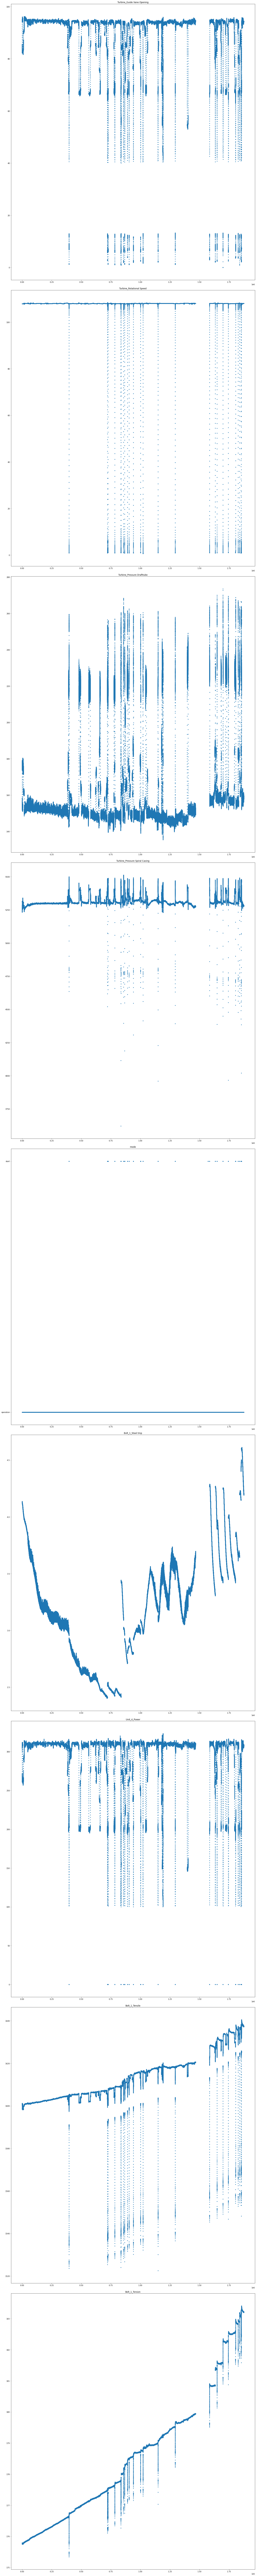

In [11]:
fig, axs = plt.subplots(len(dataBolt1), figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].scatter(time,dataBolt1[i], marker = ".")
    axs[i].set_title(bolt1Columns[i])
fig.tight_layout()
plt.show()

## Divide data to start and operation

In [12]:
bolt1Df.shape

(1874087, 9)

In [13]:
Bolt1Startdf = bolt1Df.copy(deep=True)
IndicesToChange = Bolt1Startdf[Bolt1Startdf['mode'] == 'operation'].index
print(len(IndicesToChange))
Bolt1Startdf.loc[IndicesToChange] = np.array([None for x in range(0,len(Bolt1Startdf.columns))])
Bolt1Startdf = Bolt1Startdf.drop(columns = ['mode'],axis=1)
Bolt1Startdf.shape

1868659


(1874087, 8)

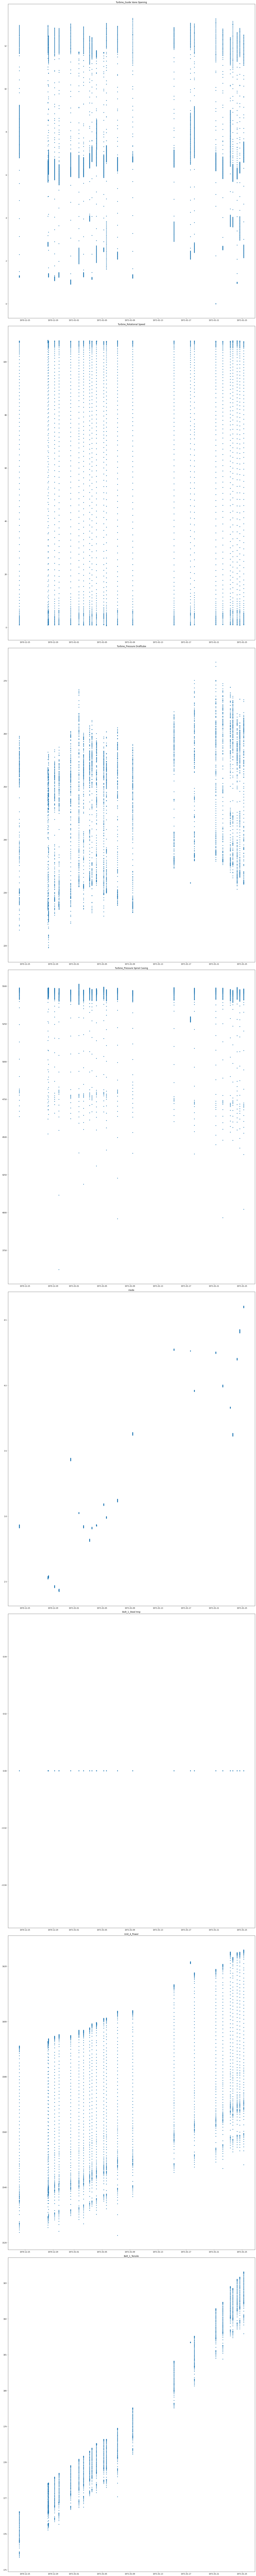

In [14]:
fig, axs = plt.subplots(Bolt1Startdf.shape[1], figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].scatter(Bolt1Startdf.index, Bolt1Startdf.iloc[0::,i], marker = ".")
    axs[i].set_title(bolt1Columns[i])
fig.tight_layout()
plt.show()

## Add Regulation Mode


In [45]:
Bolt1Regulationdf = bolt1Df.copy(deep=True)
IndicesToChange = Bolt1Regulationdf[Bolt1Regulationdf['mode'] == 'start'].index
Bolt1Regulationdf.loc[IndicesToChange] = np.array([None for x in range(0,len(Bolt1Regulationdf.columns))])
Bolt1Regulationdf = Bolt1Regulationdf.drop(columns = ['mode'],axis=1)
doNotDrop = ['Bolt_1_Steel tmp','mode','Bolt_1_Torsion', 'Bolt_1_Tensile']
indicesForRegulationMode = []
mean = Bolt1Regulationdf['Unit_4_Power'].mean() # Same as np.percentile but maps (0,1) and not (0,100)
std = Bolt1Regulationdf['Unit_4_Power'].std()
print(mean)
print(std)
# Filter our dataframe based on condition
indicesForRegulationMode = Bolt1Regulationdf[Bolt1Regulationdf['Unit_4_Power'] > mean].index
Bolt1Regulationdf.loc[indicesForRegulationMode] = np.array([None for x in range(0,len(Bolt1Regulationdf.columns))])

298.6450521624742
29.746472665833036


In [46]:
len(indicesForRegulationMode)

1443235

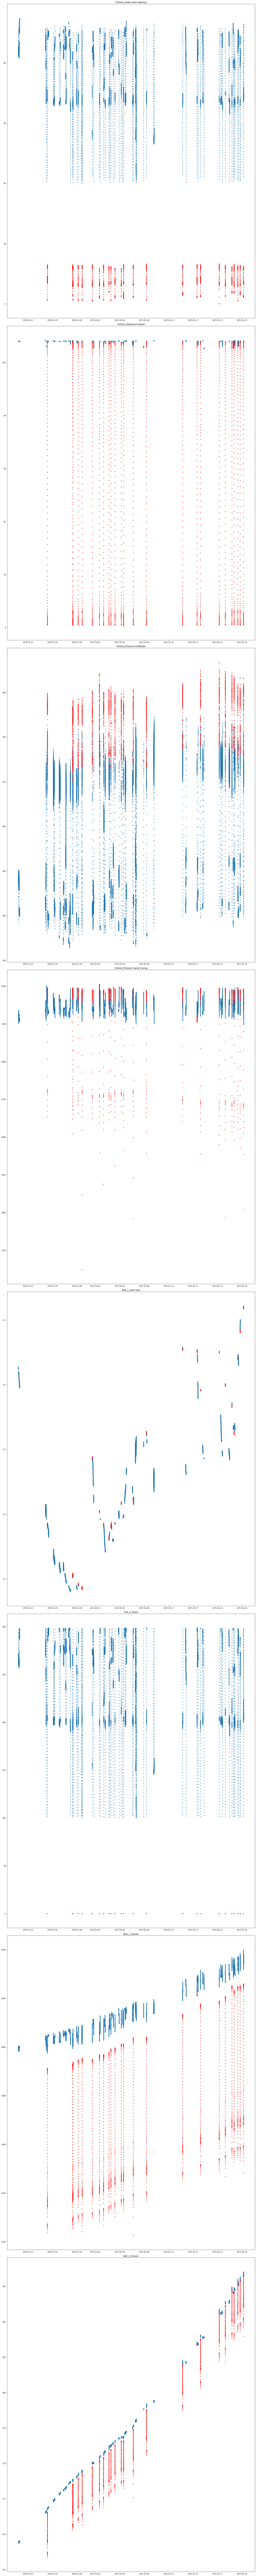

In [47]:
fig, axs = plt.subplots(Bolt1Regulationdf.shape[1], figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].scatter(Bolt1Regulationdf.index, Bolt1Regulationdf.iloc[0::,i], marker = ".")
    axs[i].scatter(Bolt1Startdf.index, Bolt1Startdf.iloc[0::,i], marker = ".", color = 'r')
    axs[i].set_title(Bolt1Startdf.columns[i])
fig.tight_layout()
plt.show()

## Operations Mode

In [51]:
Bolt1Operationdf = bolt1Df.copy(deep=True)
IndicesToChange = list(Bolt1Operationdf[Bolt1Operationdf['mode'] == 'start'].index)
print(type(IndicesToChange))
print(len(IndicesToChange))
Bolt1Operationdf.loc[IndicesToChange] = np.array([None for x in range(0,len(Bolt1Operationdf.columns))])
Bolt1Operationdf = Bolt1Operationdf.drop(columns = ['mode'],axis=1)
mean = Bolt1Operationdf['Unit_4_Power'].mean() # Same as np.percentile but maps (0,1) and not (0,100)
std = Bolt1Operationdf['Unit_4_Power'].std()
print(mean)
print(std)
# Filter our dataframe based on condition
indicesForoperationMode = Bolt1Operationdf[Bolt1Regulationdf['Unit_4_Power'] < mean].index
Bolt1Operationdf.loc[indicesForoperationMode] = np.array([None for x in range(0,len(Bolt1Operationdf.columns))])


<class 'list'>
5428
298.6450521624742
29.746472665833036


In [52]:
Bolt1Operationdf.shape

(1874087, 8)

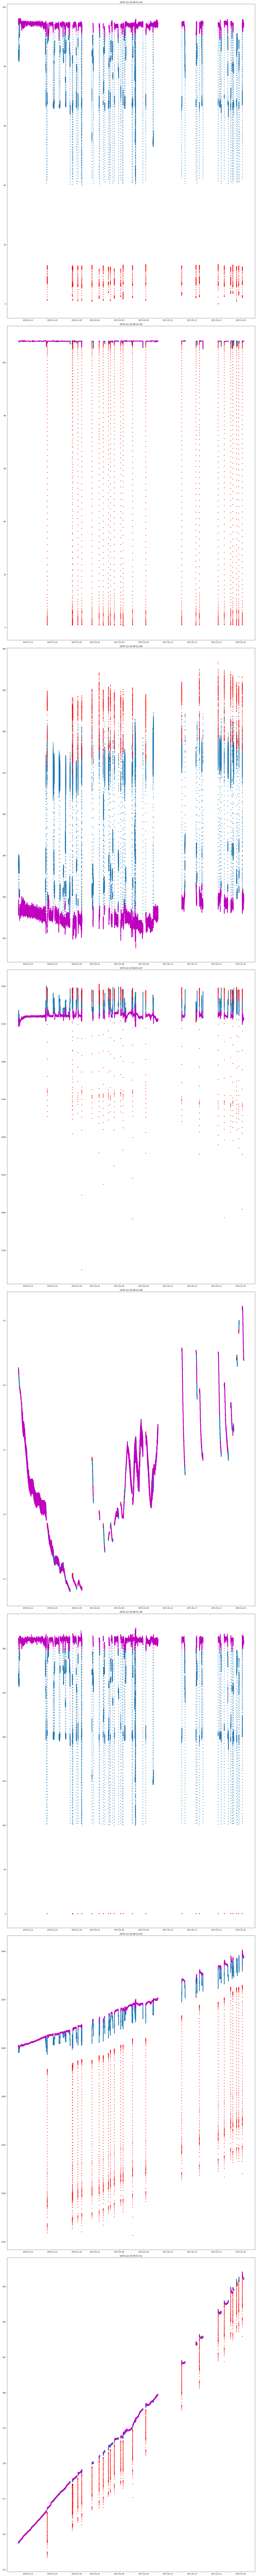

In [53]:
fig, axs = plt.subplots(Bolt1Operationdf.shape[1], figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].scatter(Bolt1Regulationdf.index, Bolt1Regulationdf.iloc[0::,i], marker = ".")
    axs[i].scatter(Bolt1Startdf.index, Bolt1Startdf.iloc[0::,i], marker = ".", color = 'r')
    axs[i].scatter(Bolt1Operationdf.index, Bolt1Operationdf.iloc[0::,i], marker = ".", color = 'm')
    axs[i].set_title(Bolt1Operationdf.index[i])
fig.tight_layout()
plt.show()

In [54]:
## drop Na for ML training
Bolt1Operationdf = Bolt1Operationdf.dropna(subset=['Bolt_1_Torsion', 'Bolt_1_Tensile'])
Bolt1Regulationdf = Bolt1Regulationdf.dropna(subset=['Bolt_1_Torsion', 'Bolt_1_Tensile'])
Bolt1Startdf = Bolt1Startdf.dropna(subset=['Bolt_1_Torsion', 'Bolt_1_Tensile'])

In [56]:
Bolt1Regulationdf.to_csv('Unit4/Bolt1Regulationdf.csv', index=False)
Bolt1Operationdf.to_csv('Unit4/Bolt1Operationdf.csv', index=False)
Bolt1Startdf.to_csv('Unit4/Bolt1Startdf.csv', index=False)